<h2 align="center"><strong><em>Import Modules</em></strong></h2> 

In [2]:
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
import KD_detector
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Image path folder
imgs_path = "Dataset"

C:\Users\Leonardo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<h2 align="center"><strong><em>Read Dataset</em></strong></h2> 

In [5]:
# Read the train Dataset
train_images, train_labels = KD_detector.read_dataset(dataset='train', path=imgs_path, filter='none', size=800)

  0%|                                                                                          | 0/781 [00:00<?, ?it/s]

Kidney_stone


  0%|▍                                                                                | 5/1009 [00:00<00:21, 47.16it/s]

Normal


100%|██████████████████████████████████████████████████████████████████████████████| 1009/1009 [00:20<00:00, 49.55it/s]


<h2 align="center"><strong><em>Data preprocessing</em></strong></h2> 

In [6]:
# Code to encode the string labels into numbers so to the machine understand
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)

In [8]:
# Split the data into train and test with parameters
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels_encoded, test_size=0.1, random_state=42)

In [9]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (1611, 254, 254)
X_test:  (179, 254, 254)
y_train:  (1611,)
y_test:  (179,)


In [10]:
# Normalize the image data pixels
X_test = X_test / 255.0
# Convert the labels to categorical data
y_test_onehot = to_categorical(y_test, num_classes=2)

<h2 align="center"><strong><em>Model evaluation</em></strong></h2> 

In [11]:
# Load the best model trainning result from the Model folder
model = load_model("Model/model-136-1.0000.h5")

In [12]:
model.evaluate(X_test, y_test_onehot, verbose=1)

6/6 [==============================] - 3s 322ms/step - loss: 0.3587 - accuracy: 0.9553


[0.3587435781955719, 0.9553072452545166]

In [13]:
prediction = model.predict(X_test)

6/6 [==============================] - 2s 309ms/step


In [15]:
y_pred = np.argmax(prediction, axis=1)

In [16]:
#print('Predicted: ', y_pred[0:30])
#print('Actual:    ', y_test[0:30])

<h2 align="center"><strong><em>Metrics</em></strong></h2> 

\begin{equation}
accuracy=\sum_{i=1}^N \frac{TP+TN}{TP+TN+FP+FN}
\end{equation}

\begin{equation}
recall=\sum_{i=1}^N \frac{TP}{TP+FN}
\end{equation}

\begin{equation}
precision=\sum_{i=1}^N \frac{TP}{TP+FP}
\end{equation}

In [17]:
target_names = ['KD', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          KD       1.00      0.90      0.95        81
      Normal       0.92      1.00      0.96        98

    accuracy                           0.96       179
   macro avg       0.96      0.95      0.95       179
weighted avg       0.96      0.96      0.96       179



In [18]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [19]:
print(cm)

[[73  8]
 [ 0 98]]


In [20]:
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

In [36]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
recall = tp/(tp + fn)
precision = tp/(tp + fp)
sensitivity = tp/(tp + fn)
specificity = tn/(tn+fp)

In [37]:
def plot_images(X_test, y_pred, y_test, grid_size):
    font_style = {'fontsize': 12, 'fontweight': 2}
    rows = grid_size[0]
    cols = grid_size[1]
    panel = rows*cols
    fig = plt.figure(figsize=(20, 20))  # width, height in inches
    for i in range(0, panel):
        ax = fig.add_subplot(rows, cols, i + 1)
        
        if y_pred[i] == 1 and y_pred[i] == y_test[i]:
            kd_percent = np.min(prediction[i]) * 100
            nm_percent = np.max(prediction[i]) * 100
            color = 'green'
        elif y_pred[i] == 0 and y_pred[i] == y_test[i]:
            kd_percent = np.max(prediction[i]) * 100
            nm_percent = np.min(prediction[i]) * 100
            color = 'green'
        elif y_pred[i] == 1 and y_pred[i] != y_test[i]:
            kd_percent = np.min(prediction[i]) * 100
            nm_percent = np.max(prediction[i]) * 100
            color = 'red'
        elif y_pred[i] == 0 and y_pred[i] != y_test[i]:
            kd_percent = np.max(prediction[i]) * 100
            nm_percent = np.min(prediction[i]) * 100
            color = 'red'

        ax.set_title(f"Kidney_stone: {kd_percent:.2f}%\nNormal: {nm_percent:.2f}%", fontdict=font_style, color=color)
            
        ax.imshow(X_test[i], interpolation='nearest', cmap='gray')
    
    fig.tight_layout()

<h2 align="center"><strong><em>Results visualization</em></strong></h2> 

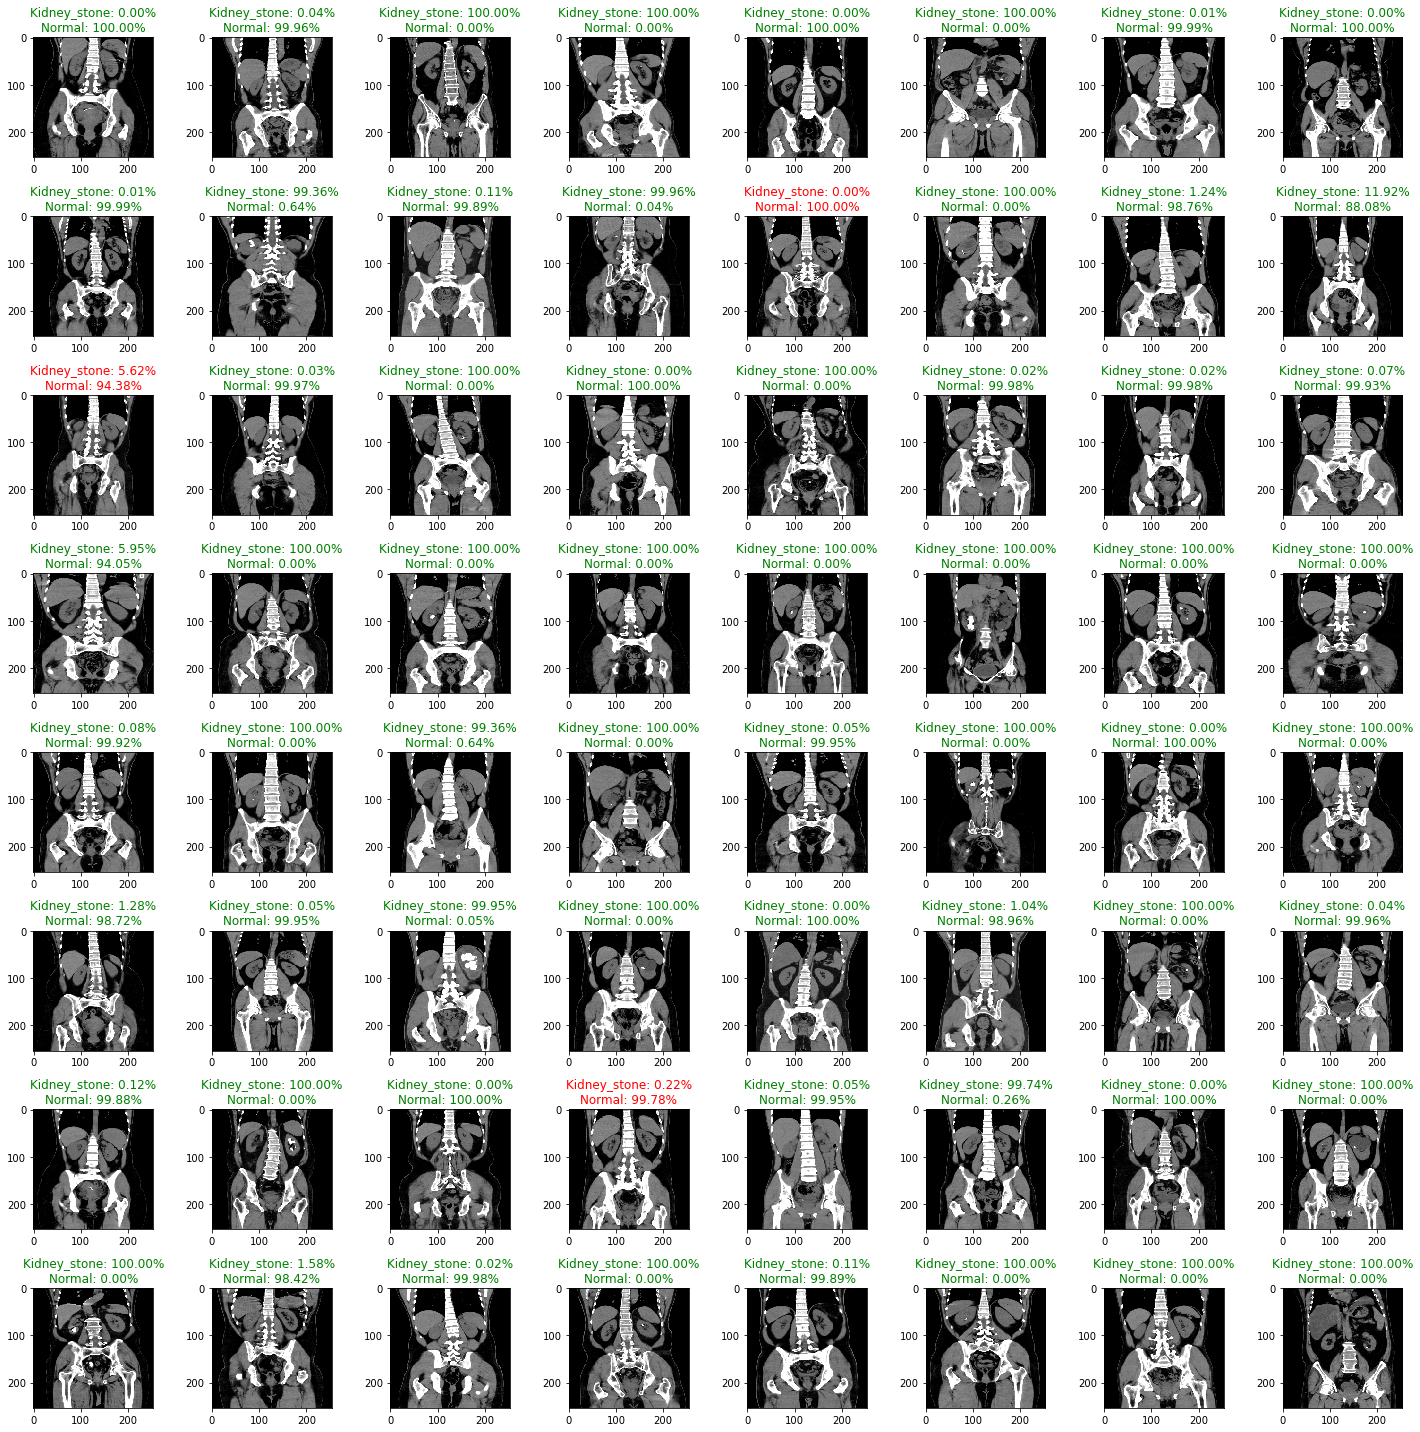

In [38]:
plot_images(X_test, y_pred, y_test, grid_size=(8,8))